## Loading and creating the mme_dataset

In [13]:
import pandas as pd

# create a dataframe with only the ExtendedSessionID column from the 71M SharedResponses.csv file

reader = pd.read_csv('SharedResponses.csv', usecols=['ResponseID'])

In [14]:
# code that will check if there are two of them in the dataset

# Count how many times each ResponseID appears
response_counts = reader['ResponseID'].value_counts()

# Get the ResponseIDs that appear exactly twice
ids_to_keep = response_counts[response_counts == 2].index

# Filter the rows where ResponseID is in the list of ids_to_keep
complete_responseid = reader[reader['ResponseID'].isin(ids_to_keep)]


In [15]:
complete_responseid.value_counts().min()

2

In [16]:
complete_responseid.shape

(67907006, 1)

In [17]:
# Drop duplicates based on 'ResponseID' and keep the first occurrence
complete_responseid = complete_responseid.drop_duplicates(subset=['ResponseID'], keep='first')

In [18]:
reader_subset = complete_responseid.sample(n=2000000) # want 4M rows (with accounting for NAn's and deleting rows with 'random' (around 10%)), so 4M / 2 = 2M ResponseID's necessary

In [19]:
# checking if they are all unique

reader_subset.nunique()

ResponseID    2000000
dtype: int64

In [20]:
# transform to a list to feed to the for loop that will extract all the corresponding columns from the SharedResponses.csv file

reader_sub_list = reader_subset['ResponseID'].tolist()

In [21]:
# check if it went okay
print(len(reader_sub_list))     # should be 2000000

2000000


In [22]:
# empty dataframe to append the rows to

subset = pd.DataFrame()

In [23]:
# reading SharedResponses to extract the rows with ResponseID's in reader_sub_list
# this will result in a dataframe 'subset' that contains around 4 million rows (2 * 2)

chunk_size = 500_000
reader = pd.read_csv('SharedResponses.csv', chunksize=chunk_size, dtype=str, low_memory=False)

for i, chunk in enumerate(reader):
    
    print(f"Processing chunk {i+1}")

    # Filter rows where ResponseID is in reader_subset
    subset_chunk = chunk[chunk['ResponseID'].isin(reader_sub_list)]

    # Append filtered chunk to empty df
    subset = pd.concat([subset, subset_chunk], ignore_index=True)

    print(f"Finished processing chunk {i+1}")

print("All chunks have been processed and combined.")

Processing chunk 1
Finished processing chunk 1
Processing chunk 2
Finished processing chunk 2
Processing chunk 3
Finished processing chunk 3
Processing chunk 4
Finished processing chunk 4
Processing chunk 5
Finished processing chunk 5
Processing chunk 6
Finished processing chunk 6
Processing chunk 7
Finished processing chunk 7
Processing chunk 8
Finished processing chunk 8
Processing chunk 9
Finished processing chunk 9
Processing chunk 10
Finished processing chunk 10
Processing chunk 11
Finished processing chunk 11
Processing chunk 12
Finished processing chunk 12
Processing chunk 13
Finished processing chunk 13
Processing chunk 14
Finished processing chunk 14
Processing chunk 15
Finished processing chunk 15
Processing chunk 16
Finished processing chunk 16
Processing chunk 17
Finished processing chunk 17
Processing chunk 18
Finished processing chunk 18
Processing chunk 19
Finished processing chunk 19
Processing chunk 20
Finished processing chunk 20
Processing chunk 21
Finished processin

In [24]:
subset.shape # should be 4000000, 41

(4000000, 41)

In [25]:
subset_csv = subset.to_csv('subset.csv', index=False)

### 98/2 MME

In [1]:
import pandas as pd
df_mme = pd.read_csv('subset.csv')

In [2]:
df_mme.shape

(4000000, 41)

In [3]:
df_mme.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,8,0,1,0,2,More,Utilitarian,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2225s6f4PqRQYeBd4,1153359856_8971439613901464.0,8.971440e+15,4,0,1,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,222FeDqdjF7arHsBe,-1196718414_3957475684404117.0,3.957476e+15,13,0,1,0,2,Less,Utilitarian,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,222JBu4KkKjnFQC9P,988708286_2649771417.0,2.649771e+09,12,0,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_mme['ScenarioTypeStrict'].value_counts()

ScenarioTypeStrict
Utilitarian      717820
Fitness          706192
Species          705608
Age              705476
Gender           703064
Random           352412
Social Status    109428
Name: count, dtype: int64

In [5]:
# removing all rows with 'random' in the ScenarioTypeStrict column, as LLM's don't have a random scenario

df_mme = df_mme[df_mme['ScenarioTypeStrict'] != 'Random']

# should be 4000000 - 352412 = 3647588

In [6]:
df_mme.shape

(3647588, 41)

In [7]:
# removing all rows with 'Rand' in the AttributeLevel column, as LLM's don't have a random scenario
df_mme['AttributeLevel'].value_counts()

AttributeLevel
More       358910
Less       358910
Pets       352804
Hoomans    352804
Male       351532
Female     351532
Young      341010
Old        341010
Fit        318774
Fat        318774
Rand       115558
Low         42985
High        42985
Name: count, dtype: int64

In [8]:
df_mme = df_mme[df_mme['AttributeLevel'] != 'Rand']

In [9]:
df_mme.shape # should be 3647588 - 115558 = 3532030

(3532030, 41)

In [10]:
df_mme.isna().sum()

ResponseID                      0
ExtendedSessionID               0
UserID                        404
ScenarioOrder                   0
Intervention                    0
PedPed                          0
Barrier                         0
CrossingSignal                  0
AttributeLevel                  0
ScenarioTypeStrict              0
ScenarioType                    0
DefaultChoice                   0
NonDefaultChoice                0
DefaultChoiceIsOmission         0
NumberOfCharacters              0
DiffNumberOFCharacters          0
Saved                           0
Template                   461690
DescriptionShown           461690
LeftHand                   461690
UserCountry3                33624
Man                             0
Woman                           0
Pregnant                        0
Stroller                        0
OldMan                          0
OldWoman                        0
Boy                             0
Girl                            0
Homeless      

In [11]:
# deleting rows with NaN's in the UserID column

df_mme = df_mme.dropna(subset=['UserID'])

In [15]:
df_mme.shape # should be 3532030 - 404 = 3531626

(3531626, 41)

In [ ]:
# the total dataset has to be 2.5M rows.
# 2% of that is LLM's, so 50.000 rows
# the other 98% will be humans, so 2.450.000 rows

# need to subset 2450000 rows from the 3531626 rows
# need to delete 3531626 - 2450000 = 1081626 rows

In [13]:
# randomly delete 1081626 / 2 = 540813 unique ResponseID's (is 1081626 rows), to ensure 2% of the dataset is LLMs and 98% humans

# Getting unique UserIDs
Response_unique = df_mme['ResponseID'].unique()
print(len(Response_unique))  # should be 1765813 (3531626 / 2)

# Selecting 640075 UserIDs from the unique set
Response_delete = pd.Series(Response_unique).sample(n=540813, random_state=42)

1765813


In [16]:
df_mme_98 = df_mme[~df_mme['ResponseID'].isin(Response_delete)]

In [17]:
# checking shape of df_filtered

df_mme_98.shape   # should be 2450000, 41

(2450000, 41)

In [18]:
df_mme_98.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,2222bRQqBTZ6dLnPH,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2223jMWDEGNeszivb,-1683127088_785070916172117.0,7.850709e+14,8,0,1,0,2,More,Utilitarian,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,222JBu4KkKjnFQC9P,988708286_2649771417.0,2.649771e+09,12,0,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,222RkmRCjNaQtatpJ,1422713895_6514125638536772.0,6.514126e+15,6,0,1,0,0,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,222YP87KA2EwZpYub,714578746_312767680,3.127677e+08,11,0,0,1,0,Fit,Fitness,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [74]:
# check what the distribution of RepsonseID's is (kinda)
# check if the indices of a responseID here are the same after transforming the ResponseID column
# if the indices are the same means ResponseID column is succesfully transformed

indices = df_mme_98[df_mme_98["ResponseID"] == '2222bRQqBTZ6dLnPH'].index
print(indices)

Index([0, 504816], dtype='int64')


In [98]:
# Changing the responseID

# Define the starting point for the new ResponseID
starting_id = 773566

# Step 1: Get the unique ResponseIDs
unique_response_ids = df_mme_98['ResponseID'].unique()

# Step 2: Create a mapping from old ResponseID to new 'res_' formatted ID
response_id_mapping = {old_id: f'res_{i:08d}' for i, old_id in enumerate(unique_response_ids, starting_id)}

# Step 3: Replace the original ResponseID with the new mapped IDs
df_mme_98['ResponseID'] = df_mme_98['ResponseID'].map(response_id_mapping)

C:\Users\esmku\AppData\Local\Temp\ipykernel_3992\1257459337.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mme_98['ResponseID'] = df_mme_98['ResponseID'].map(response_id_mapping)


In [99]:
# ResponseID starts with res_00627163
df_mme_98.head()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
0,res_00773566,32757157_6999801415950060.0,6.999801e+15,7,0,0,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
1,res_00773567,-1683127088_785070916172117.0,7.850709e+14,8,0,1,0,2,More,Utilitarian,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,res_00773568,988708286_2649771417.0,2.649771e+09,12,0,0,0,0,Male,Gender,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,res_00773569,1422713895_6514125638536772.0,6.514126e+15,6,0,1,0,0,Young,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,res_00773570,714578746_312767680,3.127677e+08,11,0,0,1,0,Fit,Fitness,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0


In [100]:
indices = df_mme_98[df_mme_98["ResponseID"] == 'res_00773565'].index
print(indices)

# checking if the indices are the same after transforming the ResponseID column
# compared to the indices of the ResponseID before transforming the column - they are!
# both are [0, 504816]

Index([], dtype='int64')


In [101]:
df_mme_98.tail()

,ResponseID,ExtendedSessionID,UserID,ScenarioOrder,Intervention,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,...,LargeMan,Criminal,MaleExecutive,FemaleExecutive,FemaleAthlete,MaleAthlete,FemaleDoctor,MaleDoctor,Dog,Cat
2449995,res_01998561,-1252544665_7351695836887306.0,7.351696e+15,6,1,1,0,1,Female,Gender,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2449996,res_01998562,1936263400_1837170696,1.837171e+09,2,1,0,1,0,Old,Age,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449997,res_01998563,475274106_8544354790236722.0,8.544355e+15,13,1,0,0,0,Male,Gender,...,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2449998,res_01998564,1617866231_4402803830519695.0,4.402804e+15,3,1,0,1,0,Less,Utilitarian,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
2449999,res_01998565,465679985_3374591806.0,3.374592e+09,1,1,1,0,1,Fit,Fitness,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
# resetting index

df_mme_98.reset_index(drop=True, inplace=True)

In [19]:
df_mme_98.columns

Index(['ResponseID', 'ExtendedSessionID', 'UserID', 'ScenarioOrder',
       'Intervention', 'PedPed', 'Barrier', 'CrossingSignal', 'AttributeLevel',
       'ScenarioTypeStrict', 'ScenarioType', 'DefaultChoice',
       'NonDefaultChoice', 'DefaultChoiceIsOmission', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Template', 'DescriptionShown',
       'LeftHand', 'UserCountry3', 'Man', 'Woman', 'Pregnant', 'Stroller',
       'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman',
       'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
       'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog',
       'Cat'],
      dtype='object')

EDA Countries

In [104]:
# some EDA on the country column to assess the distribution of the user ethnicity/culture
# Can't do this later as then the column will be removed because of identifyable information - the LLM dataset does not have country information

# checking which countries are in the dataset, and what their frequency is
# need this for the comparison with the non_western_dataset

print(df_mme_98['UserCountry3'].value_counts())

UserCountry3
USA    621932
DEU    159920
BRA    138684
FRA    137530
GBR    129304
        ...  
TLS         2
TCD         2
GNQ         2
SWZ         2
IOT         2
Name: count, Length: 220, dtype: int64


In [105]:
# List of countries considered 'Western' from the UN

countries = ["AND",  "AUS", "AUT", "BEL", "CAN", "CHE", "DNK", "DEU", "ESP", "FIN",  "FRA",  "GBR",  "GRC",  "IRL", 
            "ISR", "ISL", "ITA", "LIE", "LUX", "MLT", "MCO", "NLD", "NOR", "NZL", "PRT", "SMR", "SWE", "TUR", "USA" ]

# Andorra, Australia, Austria, Belgium, Canada, Switzerland, Denmark, Germany, Spain, Finland, France, United Kingdom, Greece, Ireland, 
# Israel, Iceland, Italy, Liechtenstein, Luxembourg, Malta, Monaco, Netherlands, Norway, New Zealand, Portugal, San Marino, Sweden, Turkey, USA

In [106]:
# what number of rows that is from western countries?

total_western = df_mme_98['UserCountry3'].isin(countries).sum()
print(f"Number of rows Western: {total_western}")

# this is % of the dataset that is from Western countries
print(f"Rounded % Western: {round(total_western /len(df_mme_98)*100)}")     # rounded percentage
print(f"Unrounded % Western: {total_western /len(df_mme_98)*100}")          # exact percentage

Number of rows Western: 1690800
Rounded % Western: 69
Unrounded % Western: 69.01224489795919


EDA of countries is now over

In [20]:
# already deleting some columns to ensure it fits in memory
# deleting the columns that are not necessary for the modelling

df_mme_clean = df_mme_98.drop(columns=['ExtendedSessionID', 'DefaultChoice', 'NonDefaultChoice', 'DefaultChoiceIsOmission', 'Template', 'ScenarioType', 'ScenarioOrder', 'DescriptionShown', 'LeftHand', 'UserCountry3'], axis=1)

In [21]:
df_mme_clean.shape # should be 2450000 rows and 31 columns

(2450000, 31)

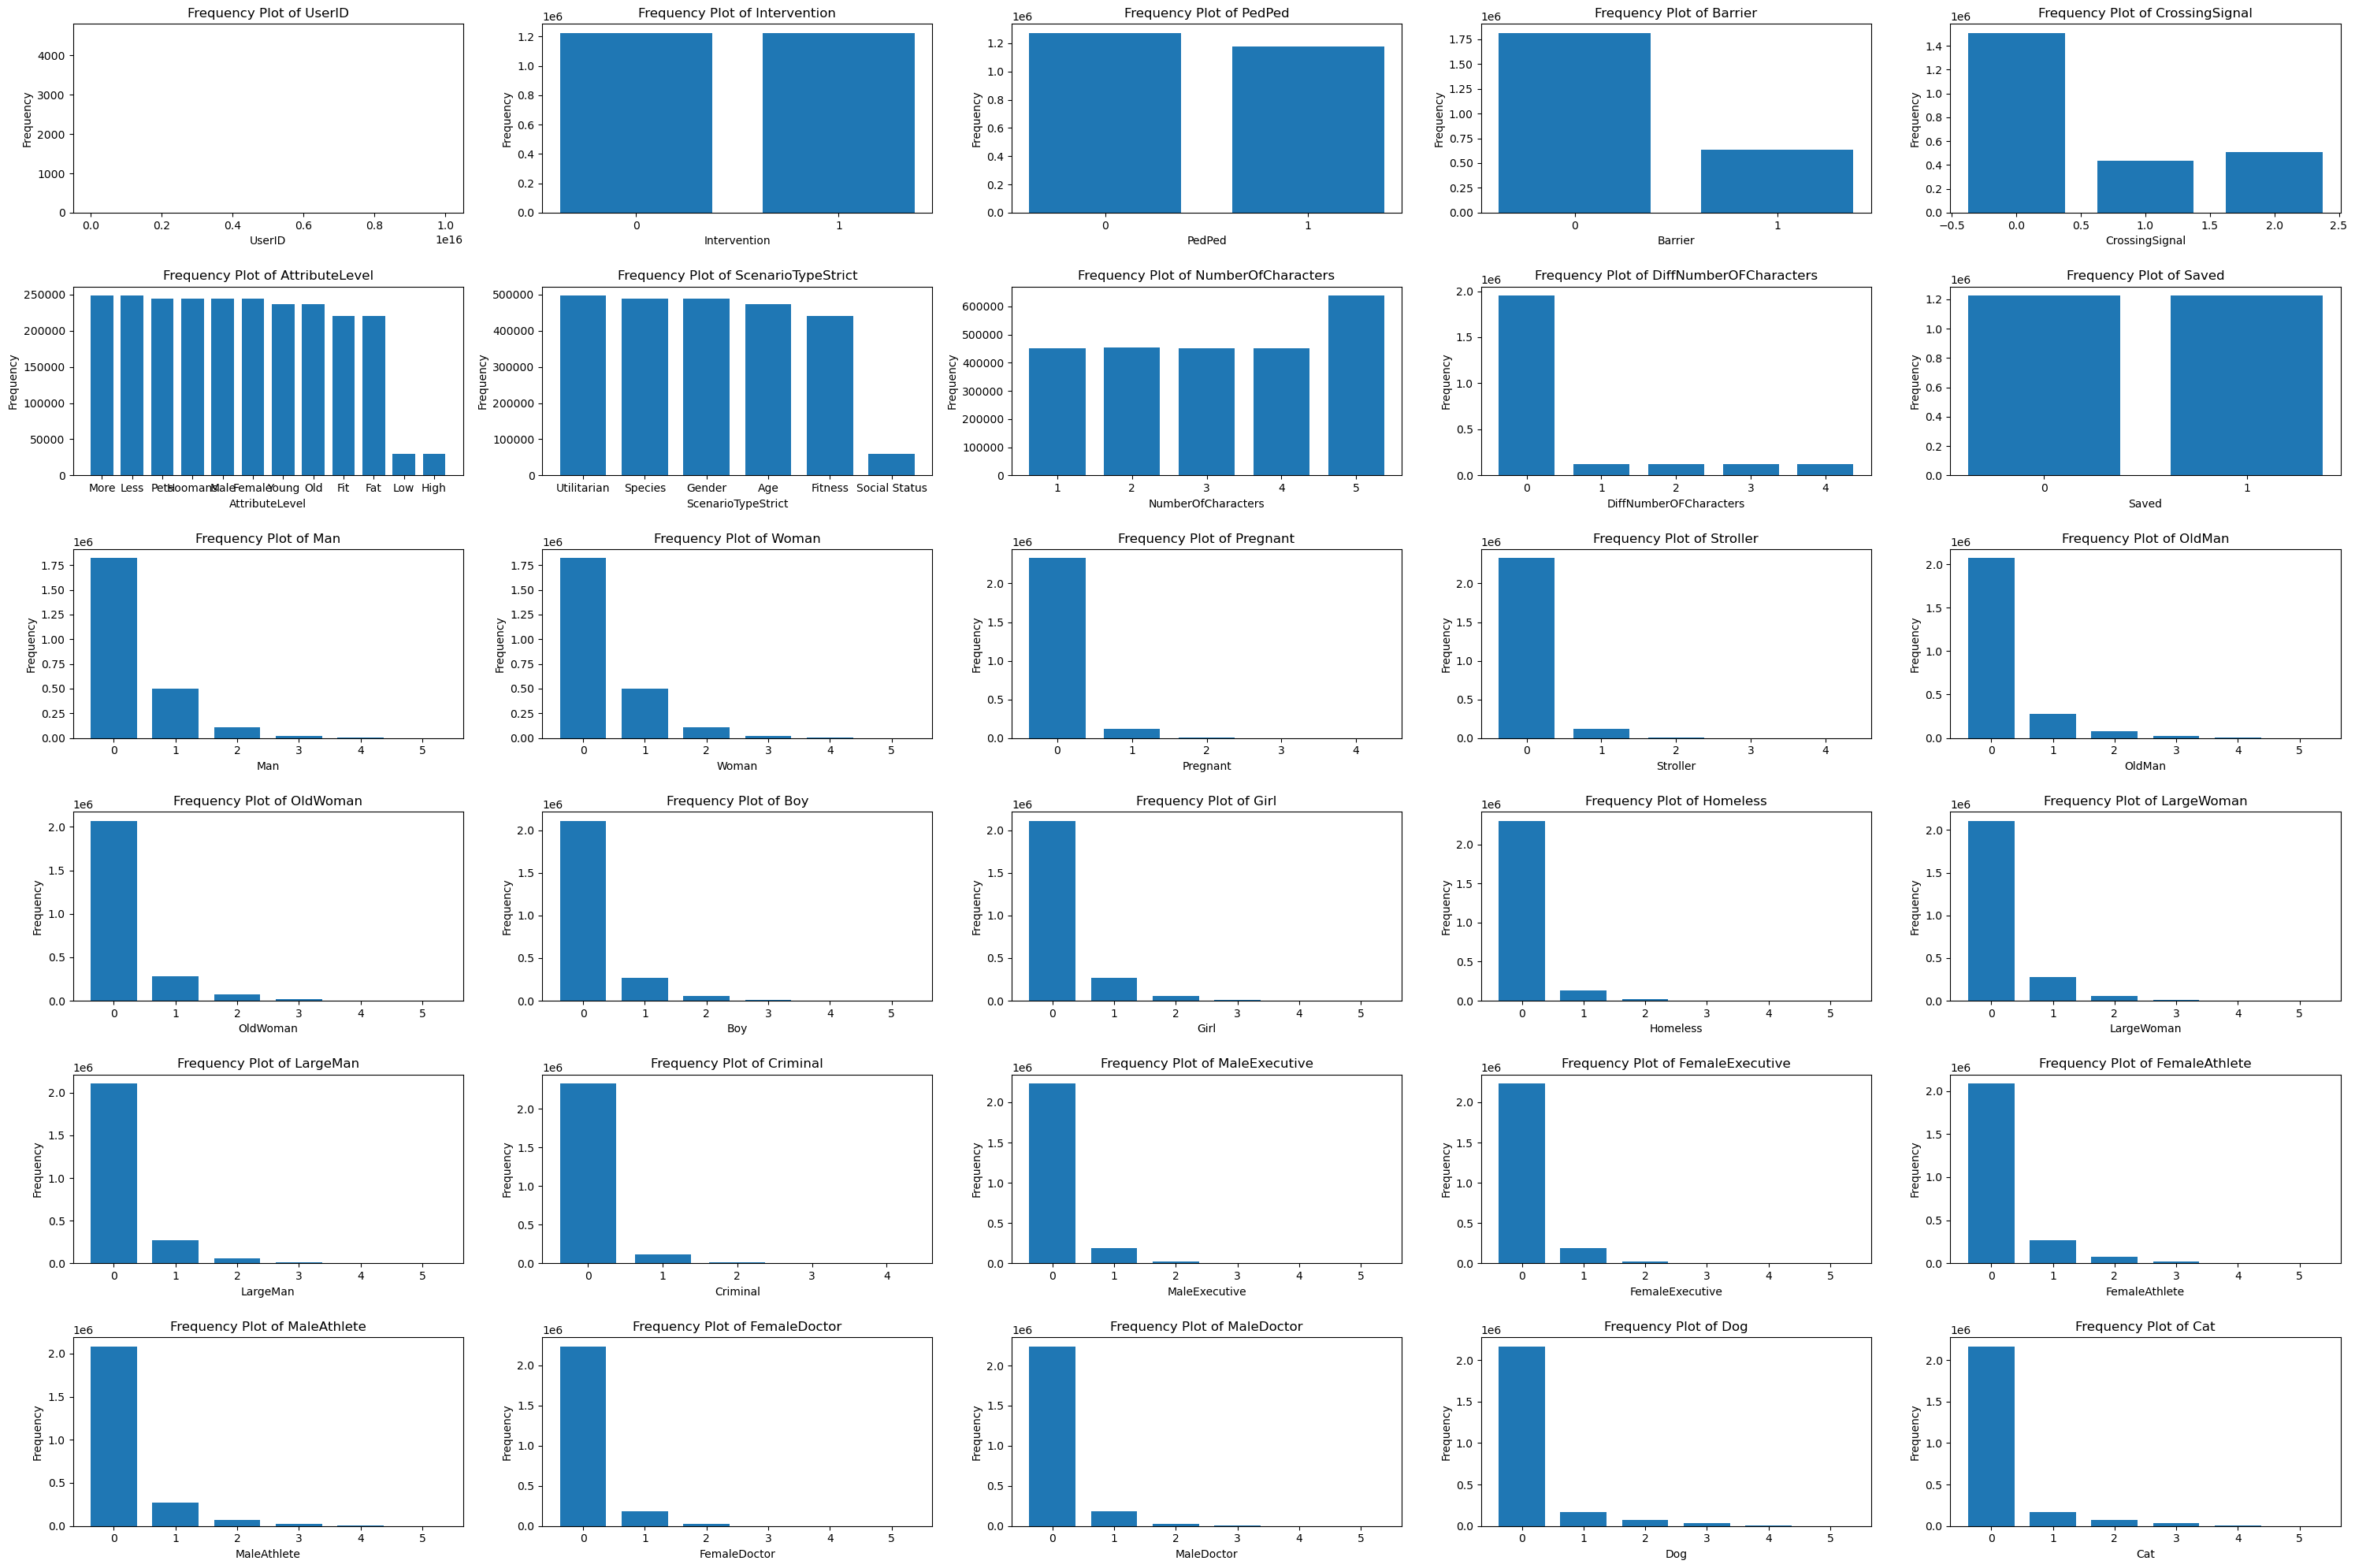

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


# List of columns for which to plot the frequency plots
column_list = df_mme_clean.columns.drop('ResponseID').tolist()

# Set up the figure and subplots (adjust the number of rows/columns depending on the number of plots)
fig, axes = plt.subplots(6, 5, figsize=(30, 20))  # 2 rows, 3 columns, adjust as needed
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through the columns and create subplots
for i, column in enumerate(column_list):
    # Count the occurrences of each category
    category_counts = df_mme_clean[column].value_counts()

    # Create a bar plot in the corresponding subplot axis
    axes[i].bar(category_counts.index, category_counts.values, width=0.75)

    # Add labels and title for each subplot
    axes[i].set_xlabel(str(column))
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f"Frequency Plot of {column}")

    # If the plot has only 2 categories, adjust the x-ticks to show 0 and 1
    if len(category_counts.index) == 2:
        axes[i].set_xticks([0, 1])

# Automatically adjust the layout for better spacing
plt.tight_layout()

# Show the entire figure with all subplots
plt.show()

In [109]:
# binarizing UserID - making all into 0
df_mme_clean['UserID'] = 0

In [110]:
# saving this pre-preprocessed mme dataset to a csv file

df_mme_clean.to_csv('mme_98_dataset.csv', index=False)

### 50/50 MME

In [111]:
# want a dataset of 2.5M rows, 1.25M LLM, 1.25M human

# creating the 1.25M rows of the human part

In [112]:
dtype = {
    'ResponseID': 'category',
    'UserID': 'int8',
    'Intervention': 'int8',
    'PedPed': 'int8',
    'Barrier': 'int8',
    'CrossingSignal': 'int8',
    'AttributeLevel': 'category',
    'ScenarioTypeStrict': 'category',
    'NumberOfCharacters': 'int8',
    'DiffNumberOFCharacters': 'int8',
    'Saved': 'int8',
    'Man': 'int8',
    'Woman': 'int8',
    'Pregnant': 'int8',
    'Stroller': 'int8',
    'OldMan': 'int8',
    'OldWoman': 'int8',
    'Boy': 'int8',
    'Girl': 'int8',
    'Homeless': 'int8',
    'LargeWoman': 'int8',
    'LargeMan': 'int8',
    'Criminal': 'int8',
    'MaleExecutive': 'int8',
    'FemaleExecutive': 'int8',
    'FemaleAthlete': 'int8',
    'MaleAthlete': 'int8',
    'FemaleDoctor': 'int8',
    'MaleDoctor': 'int8',
    'Dog': 'int8',
    'Cat': 'int8'
}


In [113]:
# function make_subset

def make_subset(data, sample_size, filter_value, types):

    """ 
    Function to create a subset of the original dataset based on the ResponseID's of the original dataset.
    It will create a subset based on a value of the UserID column
    The function will return a new dataframe with the same columns as the original dataset, where the ResponseID's are kept together.

    Input:
    - Data: a string with the path to the dataset that a subset has to be taken of
    - Sample_size: the size of the subset that has to be taken
    - Filter_value: the value of the UserID column that has to be filtered on (either 1 or 0). The subset will then only be of the either LLM's or humans
    - Types: a dictionary with the column names as keys and the data types as values
    
    Output:
    - A new dataframe with the subset of the original dataset
    
    Using chunks to ensure fast processing
    """

    df_tot = pd.read_csv(data, dtype=dtype)
    sample = int(sample_size/2)

    df_tot = df_tot[df_tot['UserID'] == filter_value]                                           # getting a subset of either only LLM's or MME's (1 or 0)
    unique_ids = df_tot.drop_duplicates(subset=['ResponseID'], keep='first')                    # only keeping unique ResponseID's (not their duplicate)
    RID_list = unique_ids['ResponseID'].sample(n=sample, random_state=41).to_list()             # to a list the ResponseID's to be kept

    print(f'Expected nr of rows in output df: {len(RID_list)*2}')                               # expected size of output df


    new_df = pd.DataFrame()

    chunk_size = 500_000
    reader = pd.read_csv(data, chunksize=chunk_size, low_memory=False)

    for i, chunk in enumerate(reader):
    
        print(f"Processing chunk {i+1}")

        # Filter rows where ResponseID is in reader_subset
        subset_chunk = chunk[chunk['ResponseID'].isin(RID_list)]

        # Append filtered chunk to empty df
        new_df = pd.concat([new_df, subset_chunk], ignore_index=True)

        print(f"Finished processing chunk {i+1}")

    print("All chunks have been processed and combined.")

    print(new_df.shape)

    # check if each ResponseID is present twice
    print(new_df['ResponseID'].nunique() == (new_df.shape[0]/2))   # should be True

    new_df = new_df.astype(dtype=types)
    
    return new_df


# will use the resulting dataframes from this function combined to create a final dataset

In [114]:
# Distribution of 
# 0 = 1250000
# 1 = 1250000
# to get a total dataset of 2500000

In [115]:
# extracting 1250000 rows with ResponseID = 0 from the original dataset
import pandas as pd
df_original = pd.read_csv('mme_98_dataset.csv', dtype=dtype)

In [116]:
df_original.shape

(2450000, 31)

In [117]:
# making subset of 1.25M of class 0, using the make_subset function from above
df50_sub_0 = make_subset('mme_98_dataset.csv', 1250000, 0, dtype)

Expected nr of rows in output df: 1250000
Processing chunk 1
Finished processing chunk 1
Processing chunk 2
Finished processing chunk 2
Processing chunk 3
Finished processing chunk 3
Processing chunk 4
Finished processing chunk 4
Processing chunk 5
Finished processing chunk 5
All chunks have been processed and combined.
(1250000, 31)
True


In [118]:
df50_sub_0.shape

(1250000, 31)

In [119]:
df50_sub_0['ResponseID'].value_counts().max()

2

In [ ]:
# saving this pre-preprocessed mme dataset to a csv file

df50_sub_0.to_csv('mme_50_dataset.csv', index=False)

: 

### Met goede proportie social status

In [ ]:
# based on the value counts of 